In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
a, b = -1, 2
x_input = np.linspace(0,20)
y_output = a*x_input + b 

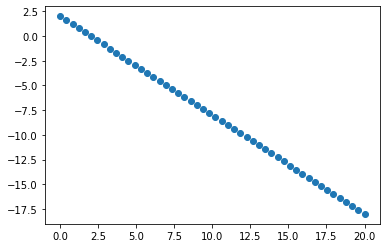

In [3]:
plt.scatter(x_input, y_output)
plt.show()

## Adagrad Algorithm

In [4]:
def adagrad_GD(x_input_fun, y_output_fun, learing_rate, max_iter):
    m = len(x_input_fun)
    epsilon = 1e-6
    theta_0, theta_1, cost = 0, 0, 0
    v_old_0, v_new_0, v_old_1, v_new_1 = 0, 0, 0, 0
    all_theta_0, all_theta_1, costs = [], [], []
    
    for i in range(max_iter):
        hypothesis = theta_0 + theta_1 * x_input_fun
        cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun)) ** 2)
        gradients = [(1/m) * np.sum(hypothesis - y_output_fun), (1/m) * np.sum(x_input_fun.dot(hypothesis - y_output_fun))]
        
        #Adagrad update
        v_new_0 = v_old_0 + (gradients[0] ** 2)
        v_new_1 = v_old_1 + (gradients[1] ** 2)
        theta_0 = theta_0 - (learing_rate/(math.sqrt(v_new_0) + epsilon))*gradients[0]
        theta_1 = theta_1 - (learing_rate/(math.sqrt(v_new_1) + epsilon))*gradients[1]
        v_old_0 = v_new_1
        v_old_1 = v_new_1
   
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)

    return all_theta_0, all_theta_1, costs

In [42]:
iteration = 500
alpha = 0.1
thetas_0, thetas_1, costs = adagrad_GD(x_input, y_output, alpha, iteration)

In [43]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([ -0.1391625 ,  -0.47944237,  -0.81972224,  -1.16000211,
        -1.50028197,  -1.84056184,  -2.18084171,  -2.52112158,
        -2.86140144,  -3.20168131,  -3.54196118,  -3.88224104,
        -4.22252091,  -4.56280078,  -4.90308065,  -5.24336051,
        -5.58364038,  -5.92392025,  -6.26420012,  -6.60447998,
        -6.94475985,  -7.28503972,  -7.62531959,  -7.96559945,
        -8.30587932,  -8.64615919,  -8.98643906,  -9.32671892,
        -9.66699879, -10.00727866, -10.34755852, -10.68783839,
       -11.02811826, -11.36839813, -11.70867799, -12.04895786,
       -12.38923773, -12.7295176 , -13.06979746, -13.41007733,
       -13.7503572 , -14.09063707, -14.43091693, -14.7711968 ,
       -15.11147667, -15.45175654, -15.7920364 , -16.13231627,
       -16.47259614, -16.812876  ])

In [44]:
r2_score(y_output, y_predicated)

0.9658082969638311

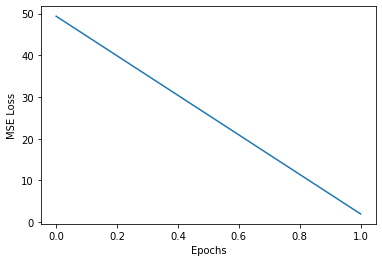

In [34]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

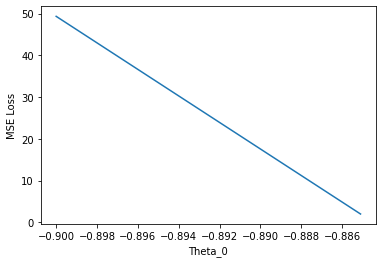

In [35]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

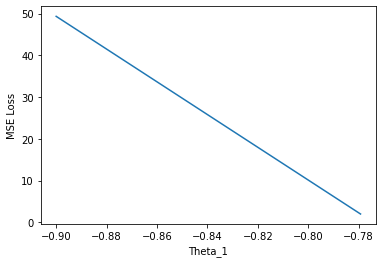

In [36]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

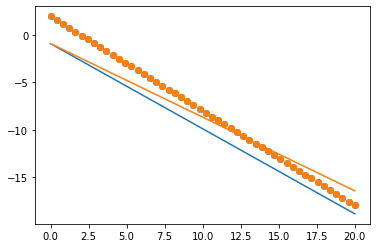

In [37]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

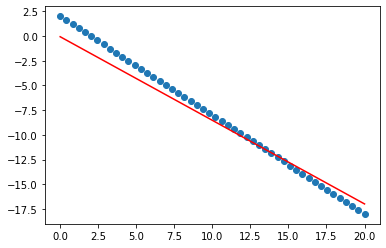

In [12]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

## Adam Algorithm

In [22]:
def adam_GD(x_input_fun, y_output_fun, learing_rate, beta_1_f, beta_2_f, max_iter):
    m = len(x_input_fun)
    epsilon = 1e-6
    theta_0, theta_1, cost = 0, 0, 0
    v_old_0, v_new_0, v_old_1, v_new_1 = 0, 0, 0, 0
    m_old_0, m_new_0, m_old_1, m_new_1 = 0, 0, 0, 0
    all_theta_0, all_theta_1, costs = [], [], []
    
    for i in range(1, max_iter+1):
        hypothesis = theta_0 + theta_1 * x_input_fun
        cost = (1/(2 * m)) * ((np.linalg.norm(hypothesis - y_output_fun)) ** 2)
        gradients = [(1/m) * np.sum(hypothesis - y_output_fun), (1/m) * np.sum(x_input_fun.dot(hypothesis - y_output_fun))]
        
        #Adam update
        m_new_0 = beta_1_f*m_old_0 + (1-beta_1_f)*gradients[0]
        m_new_1 = beta_1_f*m_old_1 + (1-beta_1_f)*gradients[1]
        
        v_new_0 = beta_2_f*v_old_0 + (1-beta_2_f)*(gradients[0] ** 2)
        v_new_1 = beta_2_f*v_old_1 + (1-beta_2_f)*(gradients[1] ** 2)   
        
        #bias correction 
        m_correction_0 = m_new_0/(1-(beta_1_f**i))
        m_correction_1 = m_new_1/(1-(beta_1_f**i))
        v_correction_0 = v_new_0/(1-(beta_2_f**i))
        v_correction_1 = v_new_1/(1-(beta_2_f**i))
        
        theta_0 = theta_0 - (learing_rate/(math.sqrt(v_correction_0) + epsilon))*m_correction_0
        theta_1 = theta_1 - (learing_rate/(math.sqrt(v_correction_1) + epsilon))*m_correction_1
        
        v_old_0 = v_new_1
        v_old_1 = v_new_1
        m_old_0 = m_new_1
        m_old_1 = m_new_1
   
        all_theta_0.append(theta_0)
        all_theta_1.append(theta_1)
        costs.append(cost)

    return all_theta_0, all_theta_1, costs

In [23]:
iteration = 200
alpha = 0.01
beta_1 = 0.5
beta_2 = 0.7
thetas_0, thetas_1, costs = adam_GD(x_input, y_output, alpha, beta_1, beta_2, iteration)

In [24]:
y_predicated = thetas_0[-1] + thetas_1[-1] * x_input
y_predicated

array([  0.23343105,  -0.12193637,  -0.4773038 ,  -0.83267122,
        -1.18803865,  -1.54340607,  -1.8987735 ,  -2.25414092,
        -2.60950835,  -2.96487577,  -3.3202432 ,  -3.67561062,
        -4.03097804,  -4.38634547,  -4.74171289,  -5.09708032,
        -5.45244774,  -5.80781517,  -6.16318259,  -6.51855002,
        -6.87391744,  -7.22928487,  -7.58465229,  -7.94001972,
        -8.29538714,  -8.65075457,  -9.00612199,  -9.36148942,
        -9.71685684, -10.07222426, -10.42759169, -10.78295911,
       -11.13832654, -11.49369396, -11.84906139, -12.20442881,
       -12.55979624, -12.91516366, -13.27053109, -13.62589851,
       -13.98126594, -14.33663336, -14.69200079, -15.04736821,
       -15.40273563, -15.75810306, -16.11347048, -16.46883791,
       -16.82420533, -17.17957276])

In [25]:
r2_score(y_output, y_predicated)

0.9768180352544119

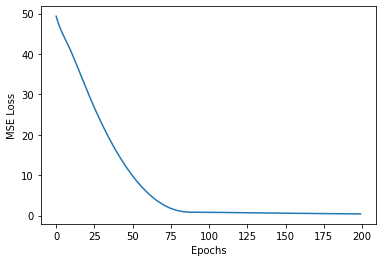

In [26]:
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.show()

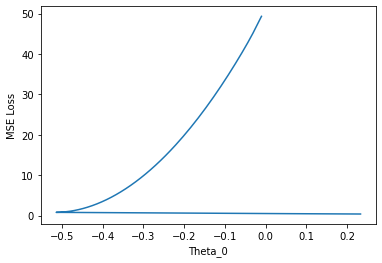

In [27]:
plt.plot(thetas_0 ,costs)
plt.xlabel("Theta_0")
plt.ylabel("MSE Loss")
plt.show()

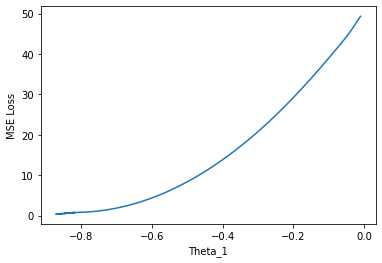

In [28]:
plt.plot(thetas_1,costs)
plt.xlabel("Theta_1")
plt.ylabel("MSE Loss")
plt.show()

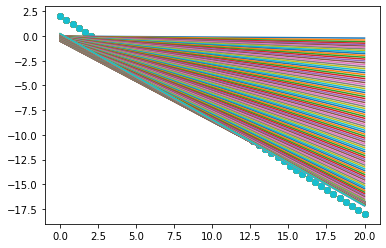

In [29]:
for i in range(iteration):
    y_predicated_draw = thetas_0[i] + thetas_1[i] * x_input
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_predicated_draw)

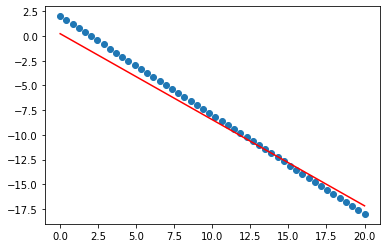

In [30]:
y_predicated_best = thetas_0[-1] + thetas_1[-1] * x_input
plt.scatter(x_input, y_output)
plt.plot(x_input, y_predicated_draw, 'r')

## Congratulations 